In [1]:
pwd

'/content'

In [2]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
num_classes=10
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [7]:
y_train=keras.utils.np_utils.to_categorical(y_train,num_classes)
y_test=keras.utils.np_utils.to_categorical(y_test,num_classes)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples


In [8]:
batch_size=128
num_classes=10
epochs=20
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train,batch_size=20,epochs=5,verbose=1,validation_data=(x_test, y_test))

Epoch 1/5
3000/3000 [==============================] - 22s 4ms/step - loss: 2.1689 - accuracy: 0.3542 - val_loss: 1.9615 - val_accuracy: 0.6718
Epoch 2/5
3000/3000 [==============================] - 13s 4ms/step - loss: 1.7182 - accuracy: 0.6140 - val_loss: 1.3312 - val_accuracy: 0.7694
Epoch 3/5
3000/3000 [==============================] - 12s 4ms/step - loss: 1.1789 - accuracy: 0.7005 - val_loss: 0.8379 - val_accuracy: 0.8192
Epoch 4/5
3000/3000 [==============================] - 12s 4ms/step - loss: 0.8699 - accuracy: 0.7500 - val_loss: 0.6173 - val_accuracy: 0.8488
Epoch 5/5
3000/3000 [==============================] - 12s 4ms/step - loss: 0.7217 - accuracy: 0.7833 - val_loss: 0.5136 - val_accuracy: 0.8671


In [11]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Loss and Accuracy):")
print(metrics)

Metrics(Loss and Accuracy):
[0.5135746002197266, 0.8671000003814697]


In [12]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 123ms/step
[[1.5443605e-03 3.0274430e-04 2.8468340e-04 3.4641817e-03 1.7093902e-03
  1.0869188e-03 1.6100082e-04 9.8032081e-01 2.8574229e-03 8.2684401e-03]
 [7.1347365e-03 4.6735355e-03 8.7558585e-01 4.6926089e-02 8.1182348e-05
  1.5036644e-02 2.5287902e-02 2.6676062e-05 2.5132913e-02 1.1450796e-04]
 [1.4833087e-03 9.0913177e-01 1.3130934e-02 1.3027692e-02 4.2671165e-03
  7.0221778e-03 1.1558677e-02 1.0211447e-02 2.1143829e-02 9.0229679e-03]
 [9.5701635e-01 1.6920136e-05 2.2239359e-03 3.5483046e-03 8.9982402e-04
  9.6077109e-03 1.9046368e-02 2.7052024e-03 2.5878700e-03 2.3476011e-03]]


In [13]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Loss and Accuracy):")
print(metrics)

Metrics(Loss and Accuracy):
[0.5135746002197266, 0.8671000003814697]


In [14]:
prediction = model.predict(x_test[5:9])
print(prediction)

1/1 [==============================] - 0s 18ms/step
[[3.5550035e-04 9.5023346e-01 4.2386651e-03 7.4691135e-03 1.8978841e-03
  2.5997143e-03 2.3144465e-03 8.3741164e-03 1.5446827e-02 7.0702042e-03]
 [2.2984522e-03 1.7161812e-03 1.6251848e-03 1.9403076e-02 6.0866255e-01
  4.1817177e-02 2.7734593e-03 1.3918974e-01 5.3296734e-02 1.2921737e-01]
 [1.3633751e-03 7.9306439e-03 2.0262990e-02 1.9394234e-02 1.8653196e-01
  7.4980266e-02 5.4615952e-02 1.7444376e-02 3.9734907e-02 5.7774132e-01]
 [6.7308486e-02 3.7081714e-03 1.0630466e-01 1.6882932e-03 2.9090807e-01
  3.4852496e-01 8.6402483e-02 3.6801568e-03 3.1827565e-02 5.9647158e-02]]


In [15]:
model.save('digit_classifier.h5')

In [16]:
!tar -zcvf digit_classifier_new.tgz digit_classifier.h5

digit_classifier.h5


In [17]:
ls

digit_classifier.h5  digit_classifier_new.tgz  sample_data/


1/1 [==============================] - 0s 57ms/step
2


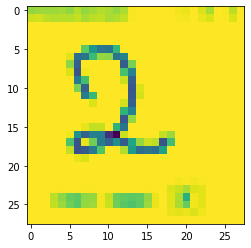

In [22]:
from keras.utils.image_utils import img_to_array
from tensorflow.keras.models import load_model
model = load_model('/content/digit_classifier.h5')
from PIL import Image
import numpy as np

img = Image.open('/content/2.png').convert("L")
img = img.resize((28,28))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

#display the image
import matplotlib.pyplot as plt
plt.imshow(img)

#predict the image
y_predict = model.predict(im2arr)
print(np.argmax(y_predict[0]))

In [2]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
